In [14]:
# Remember to update your path
%reload_ext autoreload
%autoreload 2

import sys
from datetime import date
sys.path.append('/Users/qiu_qiu/Projects/QiShiQR')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *
from Backtesting.Vectorized.Strategy import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_split import MajorContracts

import json
import warnings
warnings.filterwarnings(action='ignore')

from Backtesting.Vectorized.models import OneContractTest


# ====== Initial Configuration ========

try:
    with open('config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']
Major_DIR = config['Major path']
model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

In [2]:
start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

In [10]:
px_th=[0.0/100, 0.05/100, 0.1/100]
th_type=[1, 2, 3]

In [45]:
i = 0
for pxth in px_th:
    i = i + 1
    for thtype in th_type:
        bu_mj = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='/Users/qiu_qiu/Projects/QiShiQR/tick2016', 
                               maturity={'1606':['2015-11-1','2016-5-1'], 
                                         '1609':['2016-2-1','2016-8-1'], 
                                         '1612':['2016-6-1','2016-11-15'],
                                         '1706':['2016-10-15','2017-1-31']}, 
                               transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                               freq=freq, offset=offset, px_th=pxth)
        df_bu_train, df_bu_test, ptb = bu_mj.create_major_overlap()
        strategy = list(ptb.values())
        slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
        #slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        slm = SLM(slm, pxth, thtype).run()
        start = '20161001'
        end = '20161231'
        max_order=7
        tcas = ['None']*max_order

        test = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm, px_th=pxth)
        test.build( max_order, offset, start, end, tcas)
        test.run()

        test.plot()
        test.results[0]['benchmark'].plot()
        plt.legend()
        plt.savefig('/Users/qiu_qiu/Projects/QiShiQR/performance/' + 'bu_' + str(i) + '_' + str(thtype) + '.png')
        plt.close()
        test.performance.to_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/' + 'bu_' + str(i) + '_' + str(thtype) + '.csv')
    


bu1606 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00
bu1606 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 

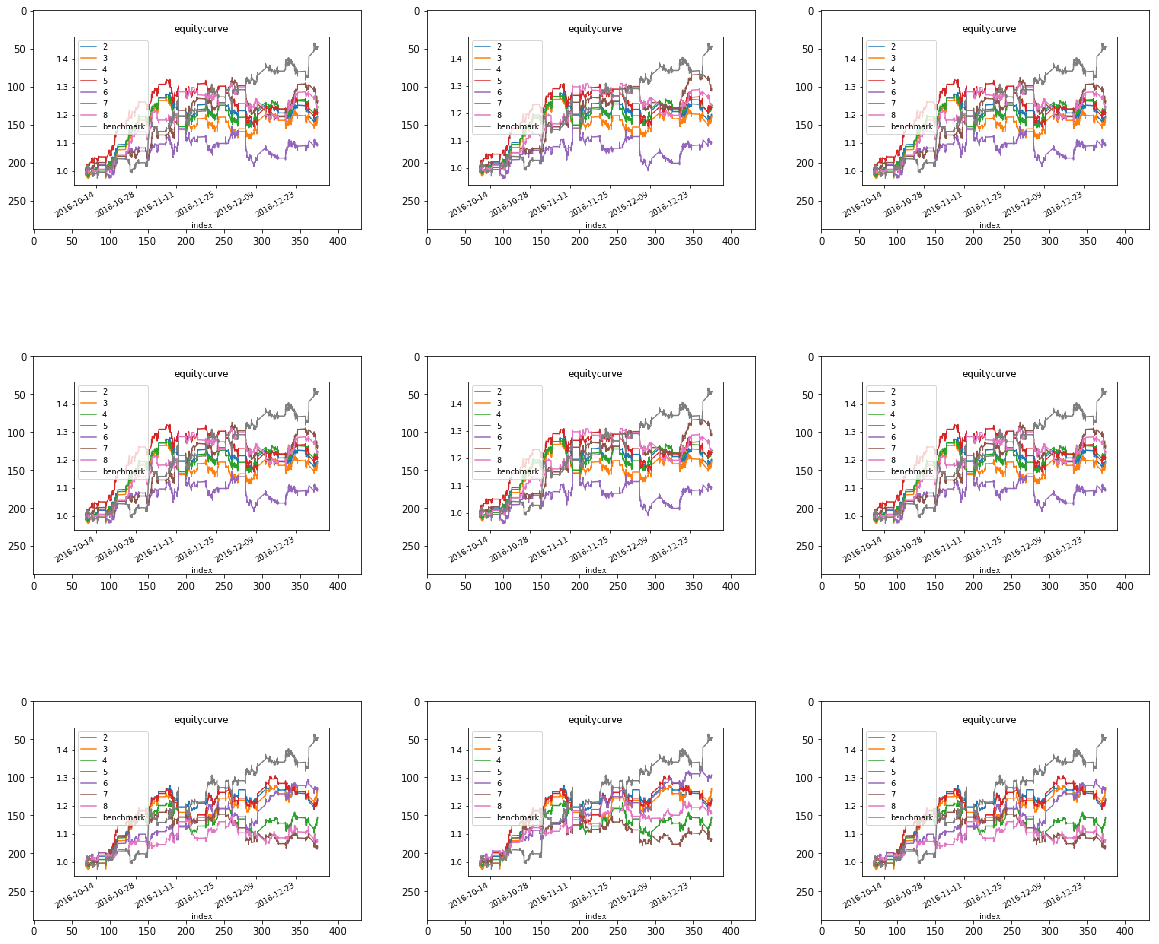

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_1.png')
img2=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_2.png')
img3=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_3.png')
img4=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_1.png')
img5=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_2.png')
img6=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_3.png')
img7=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_1.png')
img8=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_2.png')
img9=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_3.png')


fig = plt.figure(figsize=(20,18))
plt.subplot(331)
plt.imshow(img1)
plt.subplot(332)
plt.imshow(img2)
plt.subplot(333)
plt.imshow(img3)
plt.subplot(334)
plt.imshow(img4)
plt.subplot(335)
plt.imshow(img5)
plt.subplot(336)
plt.imshow(img6)
plt.subplot(337)
plt.imshow(img7)
plt.subplot(338)
plt.imshow(img8)
plt.subplot(339)
plt.imshow(img9)
plt.show()

In [48]:
import pandas as pd
perform1 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_1.csv')
perform2 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_2.csv')
perform3 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_3.csv')
perform4 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_1.csv')
perform5 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_2.csv')
perform6 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_3.csv')
perform7 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_1.csv')
perform8 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_2.csv')
perform9 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_3.csv')

display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)
display(perform6)
display(perform7)
display(perform8)
display(perform9)

,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,5,0.362576,0.004264,-0.003155,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.845830,2.939895,2183,1.251561,0.363262
6,6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,3,0.308289,0.003764,-0.004193,0.002214,0.000125,-0.037608,0.026412,-0.120119,0.527910,3.052258,1770,1.222070,0.525424
4,4,0.357782,0.001606,-0.003532,0.002451,0.000048,-0.047068,0.026412,-0.140638,0.693806,1.121907,1978,1.094730,0.406471
5,5,0.323104,0.004934,-0.003215,0.002601,0.000128,-0.023376,0.026763,-0.075981,0.808975,3.817470,2275,1.291091,0.339341
6,6,0.391653,0.003941,-0.002797,0.002719,0.000100,-0.023376,0.046855,-0.101136,0.972312,2.515701,2331,1.232527,0.292149


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,5,0.362576,0.004264,-0.003155,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.845830,2.939895,2183,1.251561,0.363262
6,6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,5,0.362576,0.004264,-0.003155,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.845830,2.939895,2183,1.251561,0.363262
6,6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,3,0.308289,0.003764,-0.004193,0.002214,0.000125,-0.037608,0.026412,-0.120119,0.527910,3.052258,1770,1.222070,0.525424
4,4,0.357782,0.001606,-0.003532,0.002451,0.000048,-0.047068,0.026412,-0.140638,0.693806,1.121907,1978,1.094730,0.406471
5,5,0.323104,0.004934,-0.003215,0.002601,0.000128,-0.023376,0.026763,-0.075981,0.808975,3.817470,2275,1.291091,0.339341
6,6,0.391653,0.003941,-0.002797,0.002719,0.000100,-0.023376,0.046855,-0.101136,0.972312,2.515701,2331,1.232527,0.292149


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,5,0.362576,0.004264,-0.003155,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.845830,2.939895,2183,1.251561,0.363262
6,6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.273324,0.003778,-0.003265,0.002203,0.000095,-0.035462,0.026412,-0.072329,0.674759,3.455355,2346,1.222886,0.329923
1,1,0.309613,0.004384,-0.003755,0.002408,0.000151,-0.038500,0.026412,-0.098543,0.641321,3.540157,1713,1.258674,0.478692
2,2,0.319637,0.002670,-0.003809,0.002333,0.000084,-0.037683,0.026412,-0.112297,0.612420,2.088116,1873,1.157515,0.393486
3,3,0.322835,0.003696,-0.003821,0.002446,0.000108,-0.041914,0.039289,-0.097763,0.640091,2.861864,2012,1.218043,0.360338
4,4,0.326959,0.004508,-0.003418,0.002527,0.000128,-0.036944,0.039289,-0.088722,0.739363,3.446686,2082,1.265955,0.335735
5,5,0.259286,0.000940,-0.003129,0.002501,0.000025,-0.036203,0.019696,-0.133146,0.799267,0.906337,2205,1.055460,0.294331
6,6,0.273674,0.001339,-0.002866,0.002647,0.000035,-0.036203,0.039289,-0.085836,0.923767,1.223132,2282,1.078999,0.261174


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.273324,0.003778,-0.003265,0.002203,0.000095,-0.035462,0.026412,-0.072329,0.674759,3.455355,2346,1.222886,0.329923
1,1,0.309613,0.004384,-0.003755,0.002408,0.000151,-0.038500,0.026412,-0.098543,0.641321,3.540157,1713,1.258674,0.478692
2,2,0.319637,0.002670,-0.003809,0.002333,0.000084,-0.037683,0.026412,-0.112297,0.612420,2.088116,1873,1.157515,0.393486
3,3,0.322835,0.003696,-0.003821,0.002446,0.000108,-0.041914,0.039289,-0.097763,0.640091,2.861864,2012,1.218043,0.360338
4,4,0.321126,0.005282,-0.003479,0.002537,0.000152,-0.036944,0.039289,-0.079123,0.729172,4.111707,2046,1.311609,0.332845
5,5,0.238691,0.001397,-0.003103,0.002486,0.000038,-0.036203,0.019696,-0.098938,0.801215,1.463411,2183,1.082435,0.289052
6,6,0.269030,0.003005,-0.002799,0.002665,0.000081,-0.036203,0.039289,-0.059672,0.952049,2.792633,2179,1.177308,0.255163


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.273324,0.003778,-0.003265,0.002203,0.000095,-0.035462,0.026412,-0.072329,0.674759,3.455355,2346,1.222886,0.329923
1,1,0.309613,0.004384,-0.003755,0.002408,0.000151,-0.038500,0.026412,-0.098543,0.641321,3.540157,1713,1.258674,0.478692
2,2,0.319637,0.002670,-0.003809,0.002333,0.000084,-0.037683,0.026412,-0.112297,0.612420,2.088116,1873,1.157515,0.393486
3,3,0.322835,0.003696,-0.003821,0.002446,0.000108,-0.041914,0.039289,-0.097763,0.640091,2.861864,2012,1.218043,0.360338
4,4,0.326959,0.004508,-0.003418,0.002527,0.000128,-0.036944,0.039289,-0.088722,0.739363,3.446686,2082,1.265955,0.335735
5,5,0.259286,0.000940,-0.003129,0.002501,0.000025,-0.036203,0.019696,-0.133146,0.799267,0.906337,2205,1.055460,0.294331
6,6,0.273674,0.001339,-0.002866,0.002647,0.000035,-0.036203,0.039289,-0.085836,0.923767,1.223132,2282,1.078999,0.261174


#-----------------

In [49]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['None']*max_order

In [50]:
i = 0
for pxth in px_th:
    i = i + 1
    for thtype in th_type:
        bu_mj = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='/Users/qiu_qiu/Projects/QiShiQR/tick2016', 
                               maturity={'1606':['2015-11-1','2016-5-1'], 
                                         '1609':['2016-2-1','2016-8-1'], 
                                         '1612':['2016-6-1','2016-11-15'],
                                         '1706':['2016-10-15','2017-1-31']}, 
                               transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                               freq=freq, offset=offset, px_th=pxth)
        df_bu_train, df_bu_test, ptb = bu_mj.create_major_overlap()
        strategy = list(ptb.values())
        slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
        #slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        slm = SLM(slm, pxth, thtype).run()

        test = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm, px_th=pxth)
        test.build( max_order, offset, start, end, tcas)
        test.run()

        test.plot()
        test.results[0]['benchmark'].plot()
        plt.legend()
        plt.savefig('/Users/qiu_qiu/Projects/QiShiQR/performance/' + 'bu_' + str(i) + '_' + str(thtype) + '.png')
        plt.close()
        test.performance.to_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/' + 'bu_' + str(i) + '_' + str(thtype) + '.csv')



bu1606 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00
bu1606 /Users/qiu_qiu/Projects/QiShiQR/tick2016/bu
0.0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 

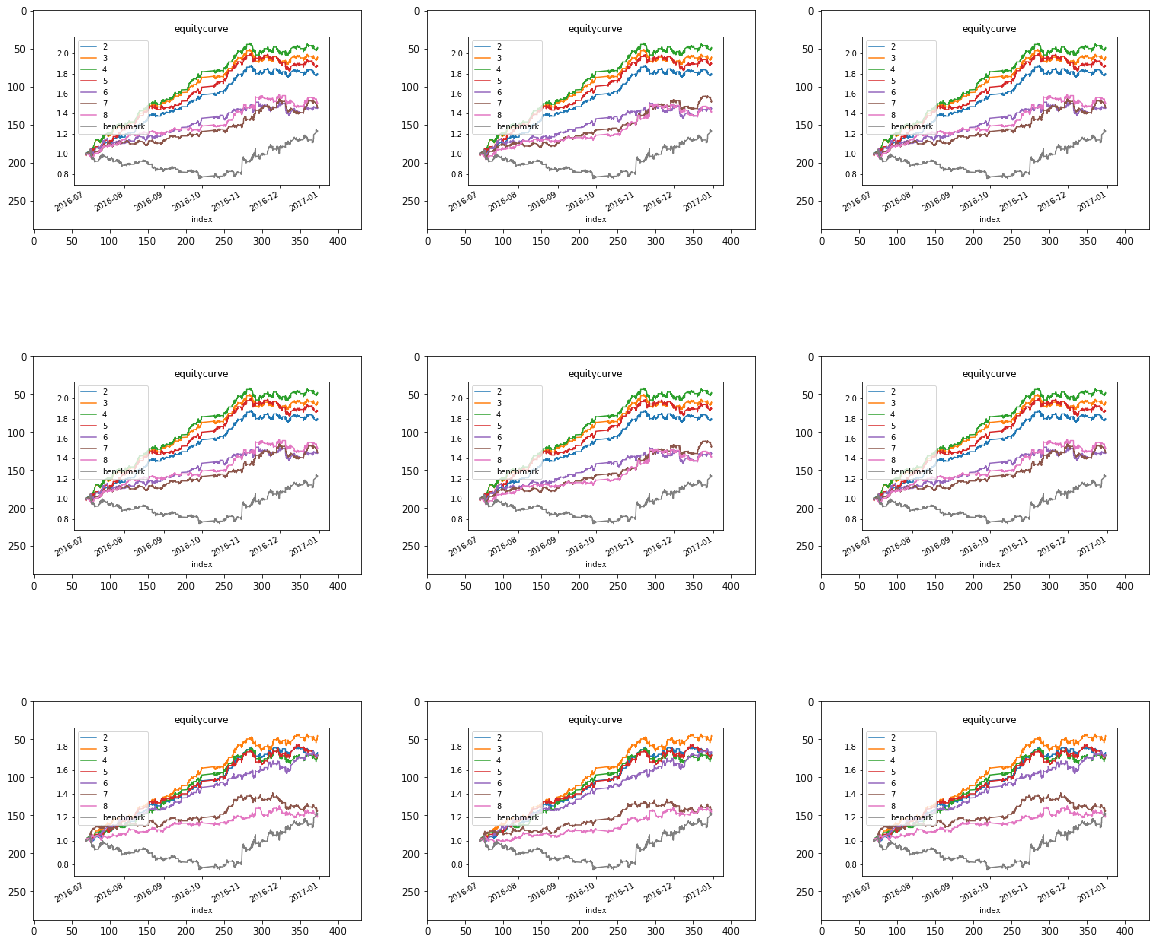

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_1.png')
img2=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_2.png')
img3=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_3.png')
img4=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_1.png')
img5=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_2.png')
img6=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_3.png')
img7=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_1.png')
img8=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_2.png')
img9=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_3.png')


fig = plt.figure(figsize=(20,18))
plt.subplot(331)
plt.imshow(img1)
plt.subplot(332)
plt.imshow(img2)
plt.subplot(333)
plt.imshow(img3)
plt.subplot(334)
plt.imshow(img4)
plt.subplot(335)
plt.imshow(img5)
plt.subplot(336)
plt.imshow(img6)
plt.subplot(337)
plt.imshow(img7)
plt.subplot(338)
plt.imshow(img8)
plt.subplot(339)
plt.imshow(img9)
plt.show()

In [53]:
import pandas as pd
perform1 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_1.csv')
perform2 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_2.csv')
perform3 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_1_3.csv')
perform4 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_1.csv')
perform5 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_2.csv')
perform6 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_2_3.csv')
perform7 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_1.csv')
perform8 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_2.csv')
perform9 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/bu_3_3.csv')

display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)
display(perform6)
display(perform7)
display(perform8)
display(perform9)

,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,3,0.302743,0.007133,-0.003631,0.002019,0.000238,-0.037608,0.026412,-0.085396,0.555990,5.890529,3691,1.877391,0.540233
4,4,0.308530,0.003714,-0.003086,0.002207,0.000110,-0.047068,0.026412,-0.096322,0.715313,3.009253,4163,1.456795,0.410041
5,5,0.297372,0.003807,-0.002770,0.002366,0.000103,-0.026522,0.026763,-0.098585,0.854048,3.200199,4543,1.468212,0.345366
6,6,0.298681,0.004130,-0.002556,0.002371,0.000103,-0.024286,0.046855,-0.085415,0.927732,3.456625,4908,1.507955,0.302363


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,3,0.293626,0.007322,-0.003654,0.002018,0.000237,-0.037608,0.026412,-0.079126,0.552286,6.234061,3807,1.900597,0.517205
4,4,0.308845,0.003680,-0.003141,0.002190,0.000108,-0.047068,0.026412,-0.107306,0.697034,2.979157,4196,1.452688,0.401096
5,5,0.273600,0.004261,-0.002802,0.002304,0.000111,-0.026522,0.026763,-0.074097,0.822272,3.893820,4733,1.524152,0.323262
6,6,0.297840,0.003416,-0.002532,0.002371,0.000087,-0.023376,0.046855,-0.088476,0.936189,2.867573,4832,1.420207,0.285596


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,3,0.302743,0.007133,-0.003631,0.002019,0.000238,-0.037608,0.026412,-0.085396,0.555990,5.890529,3691,1.877391,0.540233
4,4,0.308530,0.003714,-0.003086,0.002207,0.000110,-0.047068,0.026412,-0.096322,0.715313,3.009253,4163,1.456795,0.410041
5,5,0.297372,0.003807,-0.002770,0.002366,0.000103,-0.026522,0.026763,-0.098585,0.854048,3.200199,4543,1.468212,0.345366
6,6,0.298681,0.004130,-0.002556,0.002371,0.000103,-0.024286,0.046855,-0.085415,0.927732,3.456625,4908,1.507955,0.302363


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,3,0.302743,0.007133,-0.003631,0.002019,0.000238,-0.037608,0.026412,-0.085396,0.555990,5.890529,3691,1.877391,0.540233
4,4,0.308530,0.003714,-0.003086,0.002207,0.000110,-0.047068,0.026412,-0.096322,0.715313,3.009253,4163,1.456795,0.410041
5,5,0.297372,0.003807,-0.002770,0.002366,0.000103,-0.026522,0.026763,-0.098585,0.854048,3.200199,4543,1.468212,0.345366
6,6,0.298681,0.004130,-0.002556,0.002371,0.000103,-0.024286,0.046855,-0.085415,0.927732,3.456625,4908,1.507955,0.302363


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,3,0.293626,0.007322,-0.003654,0.002018,0.000237,-0.037608,0.026412,-0.079126,0.552286,6.234061,3807,1.900597,0.517205
4,4,0.308845,0.003680,-0.003141,0.002190,0.000108,-0.047068,0.026412,-0.107306,0.697034,2.979157,4196,1.452688,0.401096
5,5,0.273600,0.004261,-0.002802,0.002304,0.000111,-0.026522,0.026763,-0.074097,0.822272,3.893820,4733,1.524152,0.323262
6,6,0.297840,0.003416,-0.002532,0.002371,0.000087,-0.023376,0.046855,-0.088476,0.936189,2.867573,4832,1.420207,0.285596


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,3,0.302743,0.007133,-0.003631,0.002019,0.000238,-0.037608,0.026412,-0.085396,0.555990,5.890529,3691,1.877391,0.540233
4,4,0.308530,0.003714,-0.003086,0.002207,0.000110,-0.047068,0.026412,-0.096322,0.715313,3.009253,4163,1.456795,0.410041
5,5,0.297372,0.003807,-0.002770,0.002366,0.000103,-0.026522,0.026763,-0.098585,0.854048,3.200199,4543,1.468212,0.345366
6,6,0.298681,0.004130,-0.002556,0.002371,0.000103,-0.024286,0.046855,-0.085415,0.927732,3.456625,4908,1.507955,0.302363


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.229340,0.006052,-0.002855,0.002011,0.000153,-0.035462,0.026412,-0.054950,0.704472,6.597603,4856,1.744443,0.323517
1,1,0.261060,0.007222,-0.003173,0.002123,0.000250,-0.038500,0.026412,-0.065585,0.669123,6.915920,3559,1.888290,0.485811
2,2,0.267734,0.005895,-0.003311,0.002092,0.000187,-0.037683,0.026412,-0.076648,0.631868,5.504465,3871,1.725076,0.403513
3,3,0.267230,0.005905,-0.003320,0.002157,0.000174,-0.041914,0.039289,-0.069665,0.649712,5.524061,4173,1.726287,0.366163
4,4,0.265193,0.005904,-0.002976,0.002265,0.000169,-0.036944,0.039289,-0.064366,0.761085,5.565598,4305,1.726172,0.335424
5,5,0.233617,0.002080,-0.002691,0.002293,0.000057,-0.036203,0.021429,-0.114168,0.852331,2.226290,4490,1.255889,0.286414
6,6,0.223235,0.001706,-0.002599,0.002366,0.000045,-0.036203,0.039289,-0.077161,0.910592,1.910164,4651,1.209796,0.260374


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.229340,0.006052,-0.002855,0.002011,0.000153,-0.035462,0.026412,-0.054950,0.704472,6.597603,4856,1.744443,0.323517
1,1,0.261060,0.007222,-0.003173,0.002123,0.000250,-0.038500,0.026412,-0.065585,0.669123,6.915920,3559,1.888290,0.485811
2,2,0.267734,0.005895,-0.003311,0.002092,0.000187,-0.037683,0.026412,-0.076648,0.631868,5.504465,3871,1.725076,0.403513
3,3,0.267230,0.005905,-0.003320,0.002157,0.000174,-0.041914,0.039289,-0.069665,0.649712,5.524061,4173,1.726287,0.366163
4,4,0.261451,0.006121,-0.002990,0.002265,0.000178,-0.036944,0.039289,-0.058737,0.757582,5.853274,4230,1.752929,0.328842
5,5,0.215742,0.002135,-0.002663,0.002252,0.000059,-0.036203,0.021429,-0.085747,0.845715,2.473462,4464,1.262546,0.279346
6,6,0.213799,0.002000,-0.002545,0.002351,0.000055,-0.036203,0.039289,-0.065737,0.923718,2.338142,4459,1.245947,0.250953


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.229340,0.006052,-0.002855,0.002011,0.000153,-0.035462,0.026412,-0.054950,0.704472,6.597603,4856,1.744443,0.323517
1,1,0.261060,0.007222,-0.003173,0.002123,0.000250,-0.038500,0.026412,-0.065585,0.669123,6.915920,3559,1.888290,0.485811
2,2,0.267734,0.005895,-0.003311,0.002092,0.000187,-0.037683,0.026412,-0.076648,0.631868,5.504465,3871,1.725076,0.403513
3,3,0.267230,0.005905,-0.003320,0.002157,0.000174,-0.041914,0.039289,-0.069665,0.649712,5.524061,4173,1.726287,0.366163
4,4,0.265193,0.005904,-0.002976,0.002265,0.000169,-0.036944,0.039289,-0.064366,0.761085,5.565598,4305,1.726172,0.335424
5,5,0.233617,0.002080,-0.002691,0.002293,0.000057,-0.036203,0.021429,-0.114168,0.852331,2.226290,4490,1.255889,0.286414
6,6,0.223235,0.001706,-0.002599,0.002366,0.000045,-0.036203,0.039289,-0.077161,0.910592,1.910164,4651,1.209796,0.260374
